In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
first_inventory=pd.read_excel(r"C:/Users/bhava/Desktop/C.5/Inventory Dataset.xlsx")

In [4]:
second_inventory=pd.read_excel(r"C:/Users/bhava/Desktop/C.5/New Inventory.xlsx")

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
first_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Item Number  356 non-null    object        
 1   Date         356 non-null    datetime64[ns]
 2   Inventory    356 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.5+ KB


In [7]:
first_inventory.iloc[0]

Item Number            064-01-1347
Date           2023-06-17 00:00:00
Inventory                     3561
Name: 0, dtype: object

In [8]:
# This block of code employs data preprocessing
accumulate=dict()
values=[]
for i in range(len(first_inventory)):
    tail=second_inventory[second_inventory[second_inventory.columns[0]] == first_inventory.iloc[i]["Item Number"]]
    head=first_inventory.iloc[i]
    tail.loc[len(tail.index)] = list(head)
    transformed=tail.set_index(tail["Inventory Receive"]).drop(["Item Number","Inventory Receive"],axis=1).sort_index().T
    transformed["Item Number"]=first_inventory.iloc[i]["Item Number"]
    transformed.set_index("Item Number",inplace=True)
    transformed.rename_axis("Item #",inplace=True)
    for j in range(len(transformed.columns)):
        values.append({str(transformed.columns[j]):transformed.iloc[0][j]})
        accumulate[transformed.iloc[0].name]=values    

In [9]:
transformed.iloc[0].name

'064-18-9667'

In [10]:
df=pd.DataFrame(accumulate)

In [11]:
transposed_df=df.T

In [12]:
sample=transposed_df.head()

In [13]:
sample

,0,1,2,3,4,5,6,7,8,9,...,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289
064-01-1347,{'2023-06-17 00:00:00': 3561},{'2023-07-07 00:00:00': 1000},{'2023-07-09 00:00:00': 3568},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 1800},{'2023-06-17 00:00:00': 4035},{'2023-07-07 00:00:00': 624},{'2023-07-09 00:00:00': 4620},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 2200},...,{'2023-06-17 00:00:00': 19},{'2023-06-17 00:00:00': 5},{'2023-06-17 00:00:00': 7354},{'2023-08-16 00:00:00': 500},{'2023-09-08 00:00:00': 500},{'2023-09-29 00:00:00': 1380},{'2023-10-13 00:00:00': 1380},{'2023-06-17 00:00:00': 7029},{'2023-09-29 00:00:00': 992},{'2023-10-13 00:00:00': 992}
064-01-1361,{'2023-06-17 00:00:00': 3561},{'2023-07-07 00:00:00': 1000},{'2023-07-09 00:00:00': 3568},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 1800},{'2023-06-17 00:00:00': 4035},{'2023-07-07 00:00:00': 624},{'2023-07-09 00:00:00': 4620},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 2200},...,{'2023-06-17 00:00:00': 19},{'2023-06-17 00:00:00': 5},{'2023-06-17 00:00:00': 7354},{'2023-08-16 00:00:00': 500},{'2023-09-08 00:00:00': 500},{'2023-09-29 00:00:00': 1380},{'2023-10-13 00:00:00': 1380},{'2023-06-17 00:00:00': 7029},{'2023-09-29 00:00:00': 992},{'2023-10-13 00:00:00': 992}
064-01-1375,{'2023-06-17 00:00:00': 3561},{'2023-07-07 00:00:00': 1000},{'2023-07-09 00:00:00': 3568},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 1800},{'2023-06-17 00:00:00': 4035},{'2023-07-07 00:00:00': 624},{'2023-07-09 00:00:00': 4620},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 2200},...,{'2023-06-17 00:00:00': 19},{'2023-06-17 00:00:00': 5},{'2023-06-17 00:00:00': 7354},{'2023-08-16 00:00:00': 500},{'2023-09-08 00:00:00': 500},{'2023-09-29 00:00:00': 1380},{'2023-10-13 00:00:00': 1380},{'2023-06-17 00:00:00': 7029},{'2023-09-29 00:00:00': 992},{'2023-10-13 00:00:00': 992}
064-01-1385,{'2023-06-17 00:00:00': 3561},{'2023-07-07 00:00:00': 1000},{'2023-07-09 00:00:00': 3568},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 1800},{'2023-06-17 00:00:00': 4035},{'2023-07-07 00:00:00': 624},{'2023-07-09 00:00:00': 4620},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 2200},...,{'2023-06-17 00:00:00': 19},{'2023-06-17 00:00:00': 5},{'2023-06-17 00:00:00': 7354},{'2023-08-16 00:00:00': 500},{'2023-09-08 00:00:00': 500},{'2023-09-29 00:00:00': 1380},{'2023-10-13 00:00:00': 1380},{'2023-06-17 00:00:00': 7029},{'2023-09-29 00:00:00': 992},{'2023-10-13 00:00:00': 992}
064-01-1399,{'2023-06-17 00:00:00': 3561},{'2023-07-07 00:00:00': 1000},{'2023-07-09 00:00:00': 3568},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 1800},{'2023-06-17 00:00:00': 4035},{'2023-07-07 00:00:00': 624},{'2023-07-09 00:00:00': 4620},{'2023-07-10 00:00:00': 2000},{'2023-08-04 00:00:00': 2200},...,{'2023-06-17 00:00:00': 19},{'2023-06-17 00:00:00': 5},{'2023-06-17 00:00:00': 7354},{'2023-08-16 00:00:00': 500},{'2023-09-08 00:00:00': 500},{'2023-09-29 00:00:00': 1380},{'2023-10-13 00:00:00': 1380},{'2023-06-17 00:00:00': 7029},{'2023-09-29 00:00:00': 992},{'2023-10-13 00:00:00': 992}


In [14]:
dates=[]
for i in range(len(sample.columns)):
    dates.append(list(sample[i][0].keys())[0].split()[0])

In [15]:
list(sample[0][0].keys())[0].split()[0]

'2023-06-17'

In [16]:
list(sample[1289][0].values())[0]

992

In [17]:
# Assignment of each value in it's appropriate cell
for i in range(len(transposed_df.columns)):
    for j in range(transposed_df.shape[0]):
        transposed_df[i][j]=list(transposed_df[i][j].values())[0]

In [18]:
# Replacing column names with associated dates
for i in range(len(dates)):
    transposed_df = transposed_df.rename(columns={i:dates[i]})

In [19]:
transposed_df.shape

(356, 1290)

In [20]:
#desired_o/p

transposed_df.head()

,2023-06-17,2023-07-07,2023-07-09,2023-07-10,2023-08-04,2023-06-17,2023-07-07,2023-07-09,2023-07-10,2023-08-04,...,2023-06-17,2023-06-17,2023-06-17,2023-08-16,2023-09-08,2023-09-29,2023-10-13,2023-06-17,2023-09-29,2023-10-13
064-01-1347,3561,1000,3568,2000,1800,4035,624,4620,2000,2200,...,19,5,7354,500,500,1380,1380,7029,992,992
064-01-1361,3561,1000,3568,2000,1800,4035,624,4620,2000,2200,...,19,5,7354,500,500,1380,1380,7029,992,992
064-01-1375,3561,1000,3568,2000,1800,4035,624,4620,2000,2200,...,19,5,7354,500,500,1380,1380,7029,992,992
064-01-1385,3561,1000,3568,2000,1800,4035,624,4620,2000,2200,...,19,5,7354,500,500,1380,1380,7029,992,992
064-01-1399,3561,1000,3568,2000,1800,4035,624,4620,2000,2200,...,19,5,7354,500,500,1380,1380,7029,992,992


In [21]:
# transposed_df.to_excel(r"C:\Users\bhava\Desktop\transformed.xlsx")

# total inventory levels as per months

In [22]:
transposed_df['2023-06-17']

,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,...,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17,2023-06-17
064-01-1347,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-01-1361,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-01-1375,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-01-1385,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-01-1399,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9909,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-18-9962,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-18-0790,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029
064-18-3316,3561,4035,2684,5136,6399,10135,3309,2451,2056,5449,...,17,9,20,9,12419,12,19,5,7354,7029


In [23]:
transposed_df['2023-06-17'].sum().sum()

494140104

In [24]:
transposed_df.columns

Index(['2023-06-17', '2023-07-07', '2023-07-09', '2023-07-10', '2023-08-04',
       '2023-06-17', '2023-07-07', '2023-07-09', '2023-07-10', '2023-08-04',
       ...
       '2023-06-17', '2023-06-17', '2023-06-17', '2023-08-16', '2023-09-08',
       '2023-09-29', '2023-10-13', '2023-06-17', '2023-09-29', '2023-10-13'],
      dtype='object', length=1290)

In [25]:
match=dict()
for i in transposed_df.columns:
    if i in match:
        match[i]+=transposed_df[i].sum().sum()
    else:
        match[i]=transposed_df[i].sum().sum()

In [26]:
match

{'2023-06-17': 175913877024,
 '2023-07-07': 1401181824,
 '2023-07-09': 14710076640,
 '2023-07-10': 6646981376,
 '2023-08-04': 8415090264,
 '2023-08-16': 21321331280,
 '2023-09-08': 4695765312,
 '2023-09-29': 8336295360,
 '2023-10-13': 7449355536,
 '2023-08-18': 66073600,
 '2023-07-28': 1311788088,
 '2023-07-14': 6773968,
 '2023-07-21': 63971776,
 '2023-08-22': 2563200,
 '2023-08-25': 657888}

In [27]:
convert_list = [(key[5:7], value) for key, value in match.items()]

In [28]:
convert_list

[('06', 175913877024),
 ('07', 1401181824),
 ('07', 14710076640),
 ('07', 6646981376),
 ('08', 8415090264),
 ('08', 21321331280),
 ('09', 4695765312),
 ('09', 8336295360),
 ('10', 7449355536),
 ('08', 66073600),
 ('07', 1311788088),
 ('07', 6773968),
 ('07', 63971776),
 ('08', 2563200),
 ('08', 657888)]

In [29]:
final_dict={}
for i in range(len(convert_list)):
    if convert_list[i][0] in final_dict:
        final_dict[convert_list[i][0]] += convert_list[0][1]
    else:
        final_dict[convert_list[i][0]] = convert_list[0][1]
print(final_dict)

{'06': 175913877024, '07': 1055483262144, '08': 879569385120, '09': 351827754048, '10': 175913877024}


In [30]:
labels = list(final_dict.keys())
heights = list(final_dict.values())

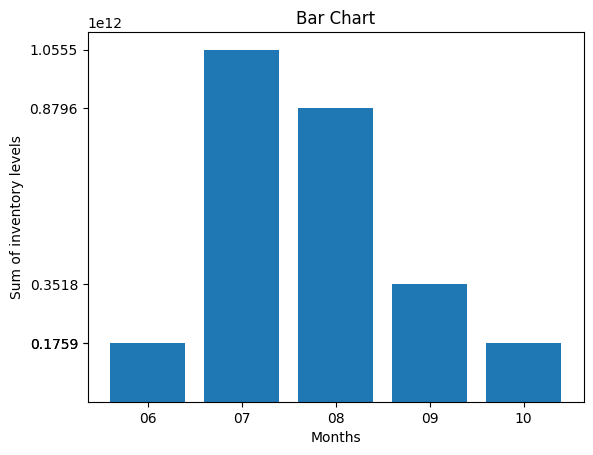

In [31]:
bars = plt.bar(labels,heights)

plt.xlabel('Months')
plt.ylabel('Sum of inventory levels')
plt.title('Bar Chart')

# total summation
plt.yticks(heights)

plt.show()

In [32]:
#The end

In [33]:
first_inventory.value_counts(dropna=False)

Item Number  Date        Inventory
064-01-0006  2023-06-17  10           1
064-13-0402  2023-06-17  235          1
064-13-3896  2023-06-17  7761         1
064-13-3653  2023-06-17  5485         1
064-13-3112  2023-06-17  1            1
                                     ..
064-09-3654  2023-06-17  17337        1
064-09-3600  2023-06-17  7280         1
064-09-3490  2023-06-17  6171         1
064-09-3418  2023-06-17  69           1
064-18-9962  2023-06-17  19           1
Name: count, Length: 356, dtype: int64

In [34]:
second_inventory.value_counts(dropna=False)

Item Number  Inventory Receive  Total Item Qty
064-01-0003  2023-09-29         5488              1
064-13-0432  2023-08-16         1692              1
064-13-0402  2023-09-08         300               1
             2023-10-13         300               1
064-13-0403  2023-08-16         132               1
                                                 ..
064-09-4784  2023-08-16         1184              1
             2023-09-08         1184              1
             2023-09-29         888               1
             2023-10-13         888               1
064-18-9938  2023-10-13         1976              1
Name: count, Length: 1039, dtype: int64